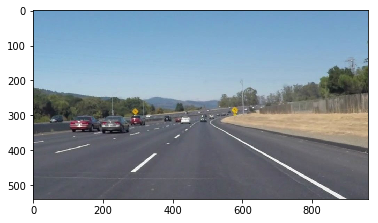

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
image=mpimg.imread('test_images/solidWhiteCurve.jpg')
plt.imshow(image)

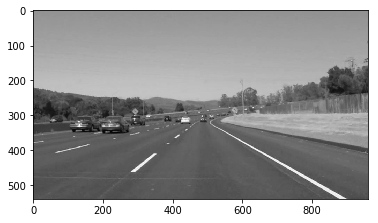

In [26]:
img_gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')

In [55]:
import os
path = 'C:/Users/lenovo/Desktop/MEDIUM/FINDING_LANE_LINES'
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join(path , 'grayscale_image.jpg'), img_gray)

True

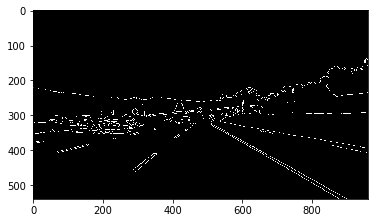

In [34]:
kernel_size = 5 #  kernel size for Gaussian smoothing
blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges,cmap='gray')

In [29]:
path = 'C:/Users/lenovo/Desktop/MEDIUM/FINDING_LANE_LINES'
cv2.imwrite(os.path.join(path , 'edges.jpg'), edges)


True

In [39]:
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

#We are going to mask the region where we expect our lane lines
    
vertices = np.array([[(170,539),(840,539),(560,340),(400,350)]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color) 
masked_edges = cv2.bitwise_and(edges, mask)
cv2.imwrite(os.path.join(path,'wanted_edges.jpg'),masked_edges)

True

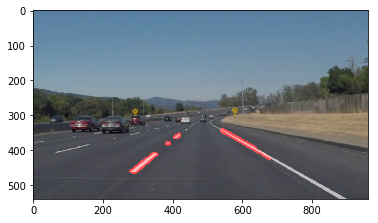

In [45]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1     # minimum number of votes 
min_line_length = 5 #minimum number of pixels for considering it a line
max_line_gap = 10 #max gap till which we can consider it a line

line_image = np.copy(image)*0 # creating a blank to draw lines on

# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)

# Iterated on the above output to draw lines on blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)


color_edges = np.dstack((edges, edges, edges)) 
   
lines_edges = cv2.addWeighted(image, 0.8, line_image,1, 0)


# Extrapolation of lane lines

In [72]:
y=350
y_size=image.shape[0]
x_size=image.shape[1]
new_line1=np.polyfit([480, 300], [480, 300],1)
x_values=[]
y_values=[]
x_left=[]
y_left=[]
x_right=[]
y_right=[]

x_points = []
y_points = []

for line in lines:
    for x1,y1,x2,y2 in line:
        x_points.append(x1)
        y_points.append(y1)
        x_points.append(x2)
        y_points.append(y2)
    
for line in lines:
    for x1,y1,x2,y2 in line:
        if x1 < 490 and x2 < 490 :
            x_left.append(x1)
            y_left.append(y1)
            x_left.append(x2)
            y_left.append(y2)
        elif x1 > 490 and x2 > 490:
            x_right.append(x1)
            y_right.append(y1)
            x_right.append(x2)
            y_right.append(y2)
    
right_pl_fit = np.polyfit(x_right, y_right,1)
left_pl_fit = np.polyfit(x_left, y_left,1)
m_left = left_pl_fit[0]
b_left = left_pl_fit[1]
minleft_x = min(x_left)
maxleft_x = max(x_left)
minleft_y = m_left*minleft_x + b_left # y = mx + c
maxleft_y = m_left*maxleft_x + b_left # y = mx + c
max_left_below_y=image.shape[0]
max_left_below_x=(max_left_below_y-b_left)/m_left
    
# Draw line for left lane using equation y = mx + c
cv2.line(line_image,(int(max_left_below_x),int(max_left_below_y)), (int(maxleft_x), int(maxleft_y)), color=[255,0,0],thickness=8)

m_right = right_pl_fit[0]
b_right = right_pl_fit[1]

min_right_y=max(y_right)

minright_x = min(x_right)
maxright_x = max(x_right)

minright_y = m_right*minright_x + b_right # y = mx + c
maxright_y = m_right*maxright_x + b_right # y = mx + c
max_right_below_y=image.shape[0]
max_right_below_x=(max_right_below_y-b_right)/m_right
    
    # Draw line for left lane using equation y = mx + c

cv2.line(line_image, (int(max_right_below_x),int(max_right_below_y)), (int(minright_x),int(minright_y)), color=[255,0,0],thickness=15) 
a=np.bitwise_or(line_image,image)

## Final Image

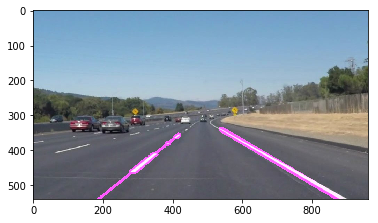

In [82]:
plt.imshow(np.bitwise_or(cv2.cvtColor(a, cv2.COLOR_BGR2RGB),line_image))